# M297 Student Representation with Data 

In this notebook, we will do the following:

- Do a pandas exploration of the M297 student dataset 
- Explore the following representations:
    - Grade Level
    - School Attending
    - Gender 
- Build pie charts to visualize the 3 representations 




In [1]:
# Let's start by importing pandas and matplotlib 

%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 

# Let's get the M297 student dataset 

studentData = pd.read_csv('../data/m297-students.csv') 

# Let's view it

studentData 

,Student Name,High School,Grade Number,Gender
0,Meredith Chang,Claremont High,9,Female
1,Sidney Orret,Claremont High,11,Female
2,Royce Cho,None,11,Male
3,Sanskar Narang,Bonita High,9,Male
4,Kaitlyn Lee,None,12,Female
5,Aleks Watkins,Claremont High,10,Male
6,Jiwoo Yoon,Palos Verdes,10,Female
7,Elizabeth Santhosh,None,11,Female
8,Anoushka Bhat,None,10,Female
9,Roark Chao,Claremont High,11,Male


In [25]:
# Let's get an understanding of the different high schools being repped in this classroom

# use unique() and nunique()

# number of high schools
print(studentData['High School'].nunique())

# list of high schools 

print(studentData['High School'].unique()) 

# Let's try to generate the frequencies of the different high schools 

# we'll use a super cool list comprehension to do this 

highSchool_counts = [len(studentData[studentData['High School'] == i]) for i in studentData['High School'].unique()]
print(highSchool_counts) 

# Does it add up to 19 students? 

print(sum(highSchool_counts))  

# Do we see something weird though? 

# The value None shows up twice. We need to fix this.

# We'll use a pandas technique called strip() to eliminate the spaces 

studentData['High School'] = studentData['High School'].str.strip() 

studentData['High School']  

# Now let's build a dictionary that we can pass to our pie chart 

highSchools = list(studentData['High School'].unique()) 
print(highSchools) 

# Let's create a dictionary to get the frequency for every high school 
HS_records = list(studentData['High School']) 
print(HS_records) 

# we'll use a really cool list comprehension

highSchool_dict = {i: HS_records.count(i) for i in HS_records} 
print(highSchool_dict) 

8
['Claremont High' 'None' 'Bonita High' 'Palos Verdes' 'La Canada High'
 'Monrovia High' 'Homeschool' 'Los Osos High']
[4, 5, 5, 1, 1, 1, 1, 1]
19
['Claremont High', 'None', 'Bonita High', 'Palos Verdes', 'La Canada High', 'Monrovia High', 'Homeschool', 'Los Osos High']
['Claremont High', 'Claremont High', 'None', 'Bonita High', 'None', 'Claremont High', 'Palos Verdes', 'None', 'None', 'Claremont High', 'La Canada High', 'Monrovia High', 'Homeschool', 'Bonita High', 'Los Osos High', 'Bonita High', 'Bonita High', 'Bonita High', 'None']
{'Claremont High': 4, 'None': 5, 'Bonita High': 5, 'Palos Verdes': 1, 'La Canada High': 1, 'Monrovia High': 1, 'Homeschool': 1, 'Los Osos High': 1}


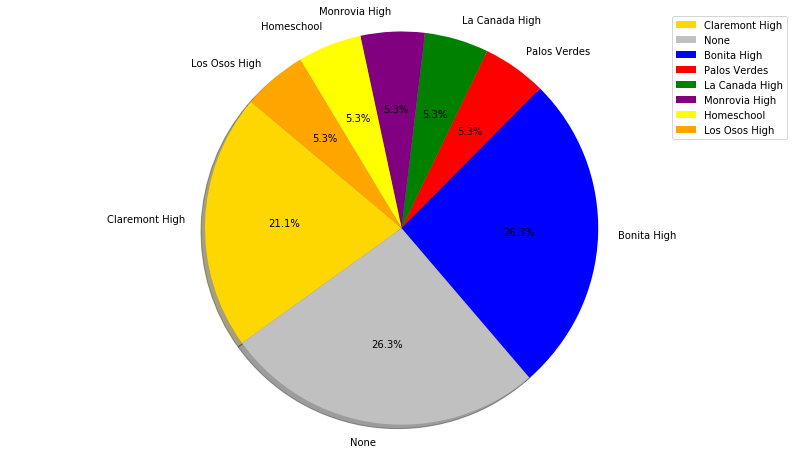

In [30]:
# Pie Chart Time! 

# Setting up parameters

labels = highSchool_dict.keys()
frequencies = highSchool_dict.values()
colors = ['gold', 'silver','blue', 'red', 'green', 'purple', 'yellow', 'orange'] 

# Time to plot 
plt.figure(figsize=(14,8))
plt.pie(frequencies, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140) 
plt.axis("equal")
plt.legend() 
 


## Student Grade Level Exploration 

In [51]:
# Let's get the frequency of of the different grade levels 

print(studentData['Grade Number'].value_counts())

# Generating a dictionary of the grade levels and their frequencies 

gradeCounts = dict(studentData['Grade Number'].value_counts()) 
print(gradeCounts) 

11    6
10    6
9     6
12    1
Name: Grade Number, dtype: int64
{11: 6, 10: 6, 9: 6, 12: 1}


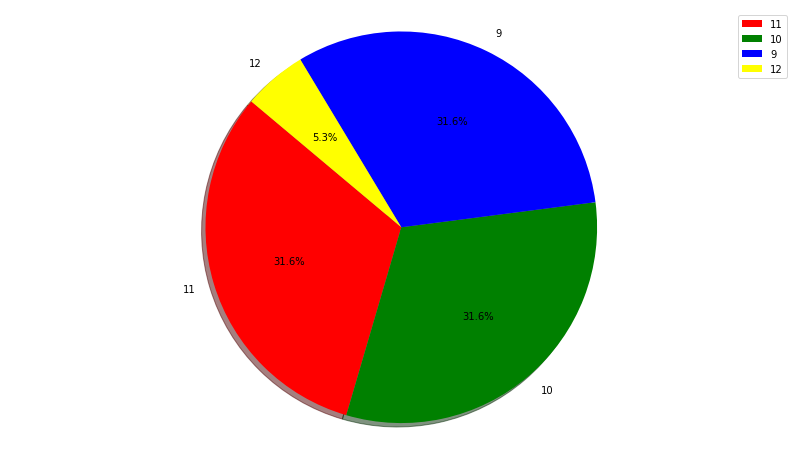

In [52]:
# Pie Chart Time 

labels = gradeCounts.keys()
frequencies = gradeCounts.values()
colors = ['red', 'green', 'blue', 'yellow']

# Time to plot 

plt.figure(figsize=(14,8))
plt.pie(frequencies, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis('equal')
plt.legend() 

Text(0.5,1,'Distribution of Grade Levels for M297 Students')

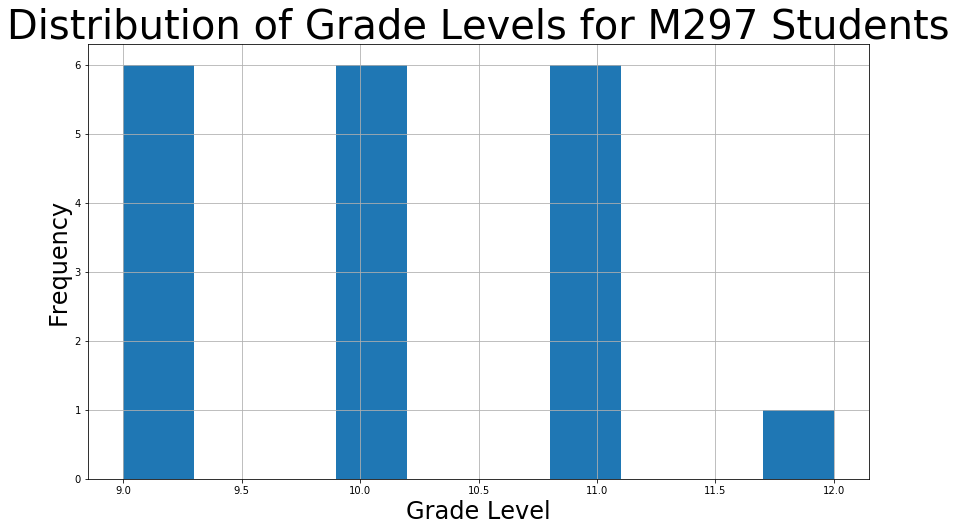

In [56]:
# Histogram

plt.figure(figsize=(14,8))
studentData['Grade Number'].hist() 
plt.xlabel("Grade Level", size="24")
plt.ylabel("Frequency", size="24")
plt.title("Distribution of Grade Levels for M297 Students", size="40")